In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')

In [2]:
#importation des données /chargement du fichier
import pandas  as pd
df_cga_prediction = pd.read_excel (r'C:\Users\amin\Downloads\amine.xlsx')
df=df_cga_prediction
pd.set_option('display.max_columns',88)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
df.columns

In [ ]:
df


In [ ]:
from sklearn.model_selection import train_test_split

X=df_cga_prediction[[ 'Mois','Ann_e','precipitation','WindVitesse','Temperature']]  # Features
y=df_cga_prediction['Nombre_de_sinistre']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
def evaluate(model):
   
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    explained_variance=metrics.explained_variance_score(y_test, ypred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, ypred)
    mse=metrics.mean_squared_error(y_test, ypred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, ypred)
    median_absolute_error=metrics.median_absolute_error(y_test, ypred)
    r2=metrics.r2_score(y_test, ypred)
    print(model.__class__.__name__)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    
    sns.regplot(y_test,ypred)
    c = [i for i in range(1,len(y_test)+1,1)]
    plt.subplot(1,2,2)
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,ypred, color="red",  linewidth=2.5, linestyle="-") 
    plt.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Test Set', fontsize=18)                           
    plt.ylabel('target', fontsize=16) 
    plt.show()

## RandomForest

RandomForestRegressor
explained_variance:  0.7378
mean_squared_log_error:  0.0315
r2:  0.7343
MAE:  958.9787
MSE:  1141683.663
RMSE:  1068.496


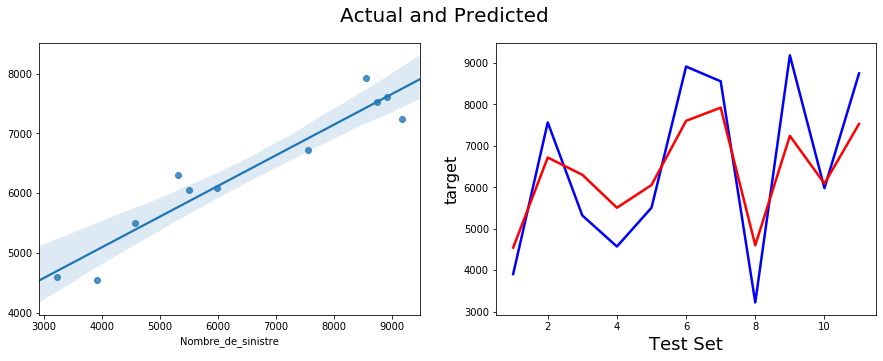

In [7]:
gridRandom=RandomForestRegressor(max_depth=58, max_features='sqrt', n_estimators=500,random_state=0)
gridRandom.fit(X_train,y_train)
evaluate(gridRandom)
testRandom=gridRandom.score(X_test,y_test)
trainRandom=gridRandom.score(X_train,y_train)

In [8]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,58,50,200],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 58, 50, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [9]:
grid_regressor.best_estimator_
grid_regressor.best_params_


{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}

RandomForestRegressor
explained_variance:  0.7934
mean_squared_log_error:  0.0281
r2:  0.791
MAE:  819.8116
MSE:  898098.0709
RMSE:  947.6804


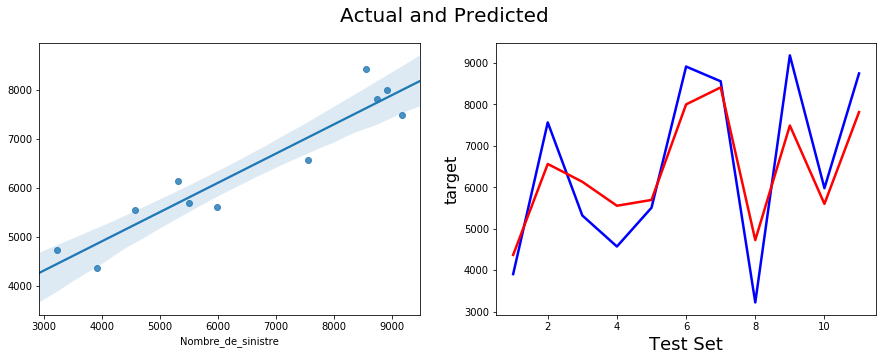

In [10]:
gridRandom=RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=200,random_state=0)
gridRandom.fit(X_train,y_train)
evaluate(gridRandom)
testRandom=gridRandom.score(X_test,y_test)
trainRandom=gridRandom.score(X_train,y_train)

## KNeighborsRegressor


In [11]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {'n_neighbors': (1,500, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
gridKnn = GridSearchCV(knn, parameters,cv=5)

GridSearchCV
explained_variance:  0.388
mean_squared_log_error:  0.0632
r2:  0.3404
MAE:  1337.3636
MSE:  2833979.0
RMSE:  1683.4426


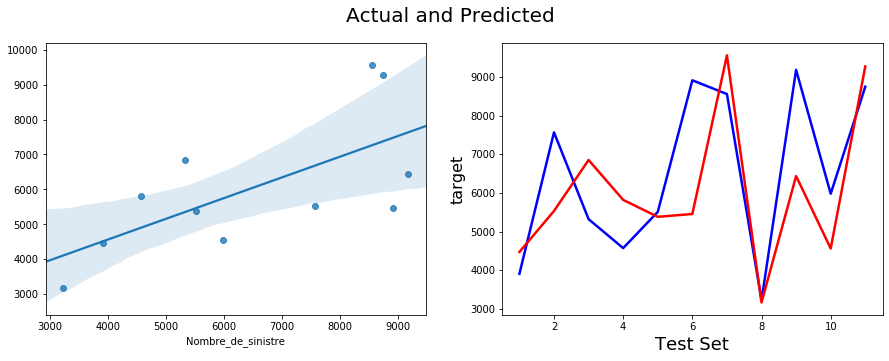

In [12]:
gridKnn.fit(X_train,y_train)
evaluate(gridKnn)
testKnn=gridKnn.score(X_test,y_test)
trainKnn=gridKnn.score(X_train,y_train)

Best Score: -0.5295235211854508
KNeighborsRegressor
explained_variance:  0.388
mean_squared_log_error:  0.0632
r2:  0.3404
MAE:  1337.3636
MSE:  2833979.0
RMSE:  1683.4426


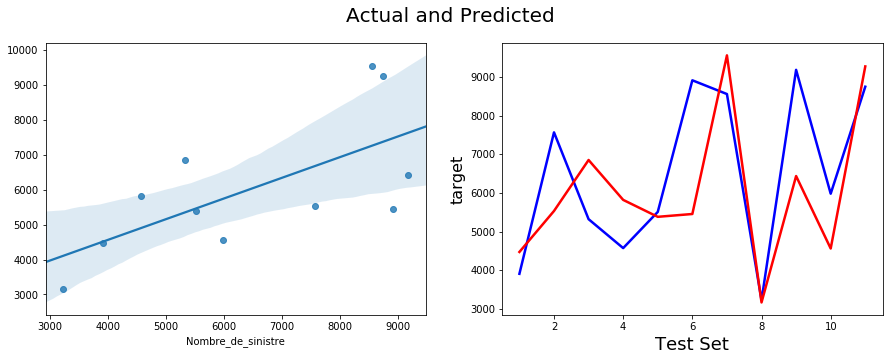

In [13]:
print('Best Score: '+str(gridKnn.best_score_))
evaluate(gridKnn.best_estimator_)

##BaggingRegressor

In [14]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
param_grid = { 'max_samples': [i for i in range(1,50)],
               'max_features': [i for i in range(1,250)]
               }
gridBag = GridSearchCV(estimator= bag, param_grid= param_grid, n_jobs=-1)
gridBag.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [15]:
gridBag.best_estimator_

BaggingRegressor(max_features=5, max_samples=20, random_state=42)

In [16]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(max_features=4, max_samples=15, random_state=42)
bag.fit(X_train, y_train)
testbag=bag.score(X_test,y_test)
trainbag=bag.score(X_train,y_train)

BaggingRegressor
explained_variance:  0.67
mean_squared_log_error:  0.0439
r2:  0.6646
MAE:  960.8545
MSE:  1441178.0691
RMSE:  1200.4908


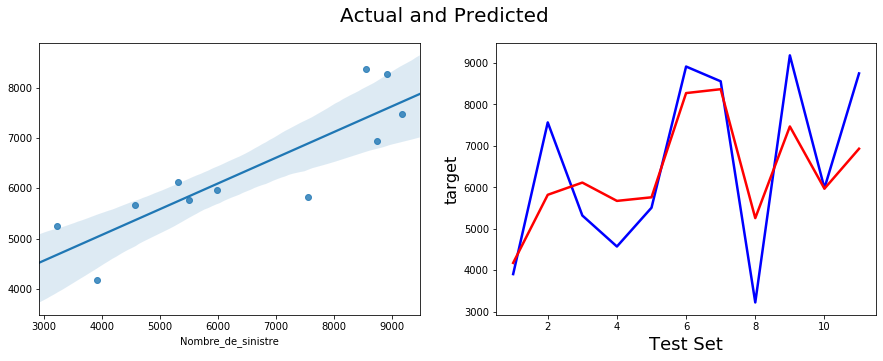

In [17]:
evaluate(gridBag.best_estimator_)

## VotingRegressor

VotingRegressor
explained_variance:  0.6957
mean_squared_log_error:  0.0363
r2:  0.6863
MAE:  1038.4911
MSE:  1347947.3398
RMSE:  1161.0113


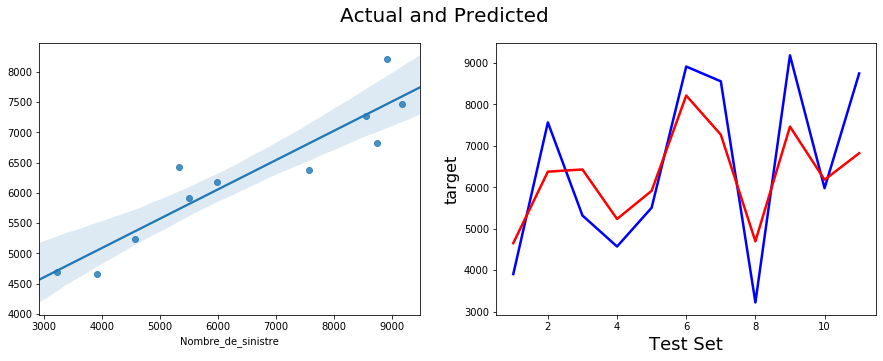

In [18]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
vot.fit(X_train, y_train)
evaluate(vot)
testvot=vot.score(X_test,y_test)
trainvot=vot.score(X_train,y_train)